# Tutorial: Getting Started with Python

DATE: Monday June 8, 2020 08:00 - 11:00 UTC

AUDIENCE: Beginner

INSTRUCTOR: Robert Leckenby, Digital Geoscientist, [Agile](https://agilescientific.com/)

### Video Stream:
<br>
<a href="https://youtu.be/iIOMiN8Cacs" target="_blank">
    <img src="./youtube_thumbnail.png" width=800 />
</a>

## Welcome
Welcome to Transform 2020 and to Getting Started with Python! This session is open to all but is aimed at people who have never coded at all or who don't know Python. Ideally you should have watched the setup videos for [Windows](https://youtu.be/FdatS_NKVrM) or [Linux](https://youtu.be/3ncwbHyZeAg) and/or followed the instructions in the [Installation guide for the tutorials](http://swu.ng/t20-python-setup) that contained the information in those videos and more. This session is meant as a demo but if you followed those installation steps, you should be able to follow along. 

All session details are available [here](https://transform2020.sched.com/).

## Agenda
START:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;08.00 UTC

BREAK:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;09.30 UTC

RESUME:&nbsp;&nbsp;&nbsp;09.40 UTC

END:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;11.00 UTC

## Content

- Simple math, logic and flow control
- Modelling [Darcy's law](https://en.wikipedia.org/wiki/Darcy%27s_law) with a function
- Computing fold wavelengths with the [Ramberg-Biot](https://blogs.agu.org/mountainbeltway/2010/10/15/friday-fold-wavelength-contrast/) equation
- Geophysical wavelets with [`bruges`](https://github.com/agile-geoscience/bruges)
- Mapping DEM's with [`matplotlib`](https://matplotlib.org/)
- Data wrangling and QC well data with [`welly`](https://github.com/agile-geoscience/welly)
- Scanning a seismic cube with [`segyio`](https://github.com/equinor/segyio)

## Set up

The [anaconda documentation](https://docs.conda.io/projects/conda/en/latest/user-guide/concepts/environments.html#conda-environments) tells us that: "A conda environment [...] contains a specific collection of conda packages that you have installed." We use these environments to isolate different projects.

We will be using an environment called `transform2020` (but you can call it whatever you wish) that was created with:

`conda create --name transform2020 python=3.7 anaconda`

We then also install the [welly](https://github.com/agile-geoscience/welly), [segyio](https://github.com/equinor/segyio) and [bruges](https://github.com/agile-geoscience/bruges) packages to import \*.las and \*.sgy files and to perform geophysical calculations. First we activated the environment:

`conda activate transform2020`

and then installed the additional libraries:

`pip install welly segyio bruges`

You can then access this environment inside a jupyter notebook using one of two methods:
1. By running `pip install nb_conda_kernels` in `base` and then running `jupyter notebook` with `base` activated.
2. By running `python -m ipykernel install --user --name transform2020` after creating the `transform2020` environment and then running `jupyter notebook` with either `base` or `transform2020` activated.

In both cases you then need to select the `transform2020` environment by selecting `Kernel>Change kernel>kernel name` in the jupyter notebook browser window.

## Python basics: numbers and functions

In [1]:
3 * 12

36

In [2]:
3 * 4.12

12.36

In [4]:
a = 3
b = 4.12
a * b

12.36

In [5]:
a * b + 4

16.36

Let's express an equation symbolically, then in Python.

$$ t = xy + z $$

<div style="padding:0.5em 1em 1em; background-color:#eeffee; border-radius:5px; border:1px solid #77aa77;">

<h2>EXERCISE</h2>

<p><b>Write the equation as a line of Python code, using the same symbols.</b></p>

<p><b>You'll also need to define some variables. Use 3, 10, and 1 for `x`, `y`, and `z` respectively.</b></p>

</div>

Here's how that looks in Python:

In [6]:
x = 3
y = 10
z = 1

t = x * y + z

t

31

Fine, but it's not very convenient to have to define `x`, `y`, and `z`, then write out the equation. If I want to do it again on different values of `x`, `y`, and `z`, then I'll have to write it all out again.

In [ ]:
x = 4
y = 100
z = 0.1

t = x * y + z

t

Instead, we can define a function:

In [7]:
def compute_t(x, y, z):
    """
    Combine the inputs as a * b + c
    """
    t = x * y + z
    return t

In [8]:
compute_t(3, 10, 1)

31

In [9]:
compute_t(4, 100, 0.1)

# shift + tab for docstring in jupyter notebook!

400.1

There's no reason we can't pass variables into here:

In [10]:
compute_t(a, b, 5)

17.36

What if we want to compute a range of values for `x`?

In [11]:
values = [0, 1, 2, 3, 4]

for value in values:
    print(compute_t(value, 10, 1))

1
11
21
31
41


In [12]:
import numpy as np

In [13]:
x = np.array([0, 1, 2, 3, 4])
x

array([0, 1, 2, 3, 4])

In [14]:
x = np.arange(5)

In [15]:
x

array([0, 1, 2, 3, 4])

In [16]:
compute_t(x, 10, 1)

array([ 1, 11, 21, 31, 41])

Pretty convenient!

And what if we need to check for conditions?

We can use `if ... else` statements for this:

In [19]:
for value in values:
    #print(value)
    if value > 2:
        print(compute_t(value, 10, 1))
    else:
        print('Small number, no value computed.')

Small number, no value computed.
Small number, no value computed.
Small number, no value computed.
31
41


## Transforming geoscience equations into Python code

We will take some classical geoscience equations and see how to code them in Python, both for single-use and in `functions` for reuse.

### Darcy's law

[Darcy's law](https://en.wikipedia.org/wiki/Darcy%27s_law) describes flow rate in porous media:

$$ Q = \frac{kA}{\mu L} \Delta P$$

where:

- $Q$ = flow rate [m<sup>3</sup>/s]
- $k$ = permeability [m<sup>2</sup>]
- $A$ = cross-sectional area [m<sup>2</sup>]
- $\mu$ = viscosity [Pa.s]
- L = length of sample [m]
- $\Delta P$ = pressure difference accross the sample [Pa]

All units are SI.

<div style="padding:0.5em 1em 1em; background-color:#eeffee; border-radius:5px; border:1px solid #77aa77;">

<h2>EXERCISE</h2>

<p><b>Implement Darcy's law in Python. You can do it either as a 'raw' Python expression, like the `t = x * y + z` example above, or as a function, like the `compute_t()` example.</b></p>
</div>

In [21]:
k = 1
A = 1
mu = 1
L = 1
dP = 0

Q = k * A * dP / (mu * L)
Q

0.0

Alternatively, using a Python function:

In [22]:
def flow_rate(k, A, mu, L, dP):
    """
    Compute flow rate using Darcy's Law.
    
    args:
        k: permeability [m2]...
    returns:
        Q: flow rate [m3/s]
    """
    Q = k * A * dP / (mu * L)
    return Q

In [23]:
flow_rate(1, 1, 1, 1, 0) #positional args

0.0

Let's use some more realistic values.

Let's consider a side wall core:

End view | Side view
:-- | :-- 
![alt](./data/swc_end.png) | ![alt](./data/swc_side.png)

In [24]:
k = 4.9346165e-13 # ~500 mD
A = 2.03e-3       # 1 inch diameter plug
mu = 8.9e-4       # ~dynamic viscosity of water at about 25°C
L = 0.0508        # 2 inch plug
dP = 689476       # ~100 psi

Q = flow_rate(k, A, mu, L, dP)

print(f'The flow rate `Q` is approx: {Q:.1e} m3/s or {Q * 3600:.2f} m3/hr')

The flow rate `Q` is approx: 1.5e-05 m3/s or 0.05 m3/hr


Let's use a NumPy array to make a plot of flow rate vs plug length. We'll need to define the range of plug lengths:

In [26]:
L = np.arange(0.05, 1, 0.005)
L

array([0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 ,
       0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135,
       0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 ,
       0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225,
       0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265, 0.27 ,
       0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 , 0.315,
       0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355, 0.36 ,
       0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  , 0.405,
       0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445, 0.45 ,
       0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 , 0.495,
       0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
       0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
       0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
       0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
       0.68 , 0.685,

In [29]:
Q = flow_rate(k, A, mu, L, dP) * 3600
#Q

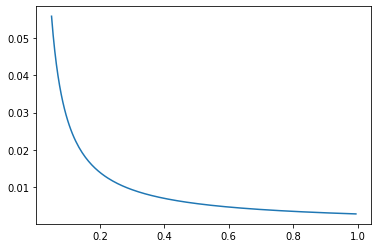

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt  

plt.plot(L, Q)
plt.show()

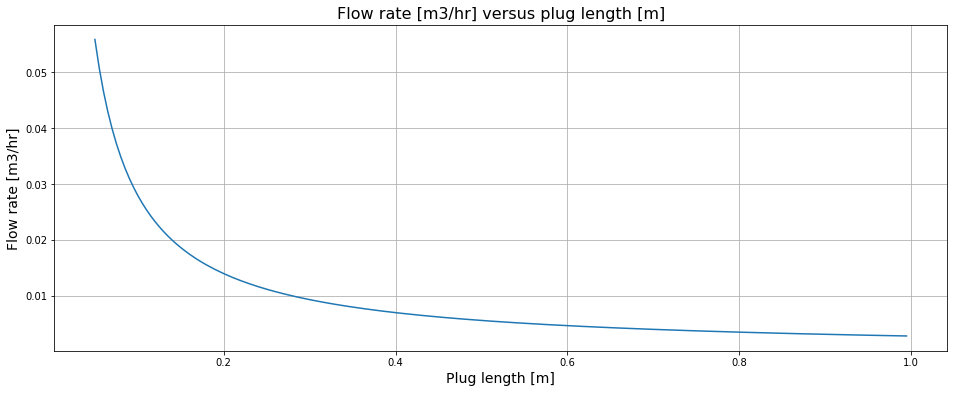

In [32]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(L, Q)
ax.grid()
ax.set_title('Flow rate [m3/hr] versus plug length [m]', fontsize=16)
ax.set_xlabel('Plug length [m]', fontsize=14)
ax.set_ylabel('Flow rate [m3/hr]', fontsize=14)
plt.show()

In [33]:
from ipywidgets import interact

@interact(dP=(0, 4, 0.1))
def make_plot(dP):
    
    # We have to compute Q every time the widget changes...
    Q = flow_rate(k, A, mu, L, dP*1e6) * 3600
    
    # ...and then make the plot again.
    fig, ax = plt.subplots(figsize=(16,6))
    ax.plot(L, Q)
    ax.grid()
    ax.set_title('Flow rate [m3/hr] versus plug length [m]', fontsize=16)
    ax.set_ylabel('Flow rate [m3/hr]', fontsize=14)
    ax.set_xlabel('Plug length [m]', fontsize=14)
    ax.text(0.83, 0.088, f"dP: {dP} MPa", size=20)
    ax.set_ylim(0, 0.1)
    plt.show()
    
    return

interactive(children=(FloatSlider(value=2.0, description='dP', max=4.0), Output()), _dom_classes=('widget-inte…

### Ramberg-Biot Equation

The [Ramberg-Biot equation](http://www.files.ethz.ch/structuralgeology/JPB/files/English/7folding.pdf) describes the wavelength $L$ of a fold:

$$ L = 2 \pi T \left(\frac{\nu}{6\nu_0}\right)^{1/3}$$

where:

- $L$ = wavelength of the fold [m]
- $\pi$ = 3.14 [unitless]
- $T$ = folded layer thickness [m]
- $\nu$ = viscosity of folded layer [Pa.s]
- $\nu_0$ = viscosity of cross-cut layer [Pa.s]

An [example](https://blogs.agu.org/mountainbeltway/2010/10/15/friday-fold-wavelength-contrast/) of the Ramberg-Biot equation in action.

This time we will define the function directly, notice we are using the $\pi$ constant from `numpy`.

First an example to discuss what we are looking into:

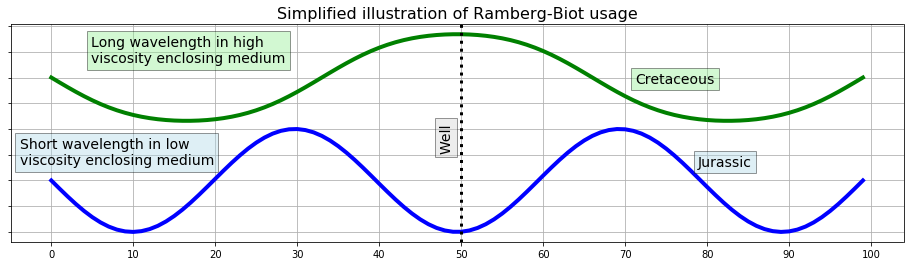

In [34]:
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(-1*np.sin(np.sin(np.linspace(0,3*np.pi,100))),lw=4, c='g')
ax.plot(-1*np.sin(np.linspace(0,5*np.pi,100)) - 2,lw=4, c='b')
ax.set_yticklabels([])
ax.set_xticks(np.arange(0,110,10))
ax.grid()

ax.set_title('Simplified illustration of Ramberg-Biot usage', fontsize=16)
textstr_0 = 'Long wavelength in high\nviscosity enclosing medium'
textstr_1 = 'Short wavelength in low\nviscosity enclosing medium'
props_cret = dict(boxstyle='square', facecolor='lightgreen', alpha=0.4)
props_jur = dict(boxstyle='square', facecolor='lightblue', alpha=0.4)
props_well = dict(boxstyle='square', facecolor='lightgrey', alpha=0.4)

ax.axvline(50, lw=3, c='k', ls=':')

ax.text(0.09, 0.95, textstr_0, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props_cret)
ax.text(0.01, 0.48, textstr_1, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props_jur)
ax.text(0.7, 0.78, 'Cretaceous', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props_cret)
ax.text(0.77, 0.4, 'Jurassic', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props_jur)
ax.text(0.48, 0.55, 'Well', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props_well, rotation='vertical')

plt.show()

Gara Anticline - Kurdistan (satellite) | Gara Anticline - Kurdistan (terrain)
:-- | :-- 
![alt](./data/gara_satellite.png) | ![alt](./data/gara_terrain.png)

[Google map source location](https://www.google.ch/maps/@36.9742638,43.6135018,12z/data=!5m1!1e4)

<div style="padding:0.5em 1em 1em; background-color:#eeffee; border-radius:5px; border:1px solid #77aa77;">

<h2>EXERCISE</h2>

<p><b>Write the Ramberg-Biot equation in a Python function, using the same variable names as shown above.</b></p>



</div>

In [35]:
def ramberg_biot(T, nu, nu_zero):
    """
    Docstring
    """
    L = 2 * np.pi * T * (nu / (6 * nu_zero))**(1/3)
    return L

In [36]:
#ramberg_biot()

Given an input data set with the required arguments:

|Period    |Formation                   |Thickness [m]|$\nu$ [Pa.s]|$\nu_0$ [Pa.s]|
|:---------|:---------------------------|:-------:|:---:|:-----:|
|Cretaceous|Aqra Bekhme Kometan Qamchuqa|730      |19   |17     |
|Jurassic  |Naokelekan Sargelu          |80       |17   |19     |
|Jurassic  |Sekhanian Sargelu           |420      |19   |17     |
|Triassic  |Baluti                      |30       |17   |19     |
|Triassic  |Kurra Chine                 |834      |18   |17     |
|Triassic  |Geli                        |575      |18   |17     |
|Triassic  |Beduh                       |64       |17   |19     |
|Triassic  |Chia Zara                   |811      |19   |17     |

***Nota Bene***: The thickness values were measured from wells, the viscosity values are simple examples values but are not measured.

We could print out the results of the calculation for each row, but we'll first need to store this table in a python data structure.

We'll put the values together in a [`tuple`](https://docs.python.org/3.7/library/stdtypes.html?highlight=tuple#tuple), this will allow us to `index` into them to retrieve one value at a time. But then we'll put all of these values together in a dictionnary (a python [`dict`](https://docs.python.org/3.7/tutorial/datastructures.html#dictionaries)) where the keys will be the formation names:

In [37]:
coords = 123, 456, -999

In [39]:
coords[2]

-999

In [41]:
x, y, z = coords
print(x)
print(y)
print(z)

# simultaneous assignment / tuple unpacking

123
456
-999


In [ ]:
# t, nu, nu_zero = my_data_tuple

In [46]:
my_dict = {'key0': 'a value', 'key1': (43, 41)}
my_dict['key1']

(43, 41)

In [47]:
data = {'ABKomQam':(730,19,17),
        'NaokSargelu': (80,17,19),
        'SekhSargelu': (420,19,17),
        'Baluti': (30,17,19),
        'KurraChine': (834,18,17),
        'Geli': (575,18,17),
        'Beduh': (64,17,19),
        'ChiaZara': (811,19,17),
       }

In [50]:
data.items()

dict_items([('ABKomQam', (730, 19, 17)), ('NaokSargelu', (80, 17, 19)), ('SekhSargelu', (420, 19, 17)), ('Baluti', (30, 17, 19)), ('KurraChine', (834, 18, 17)), ('Geli', (575, 18, 17)), ('Beduh', (64, 17, 19)), ('ChiaZara', (811, 19, 17))])

In [52]:
print('FORMATION\tWAVELENGTH')
for formation, inputs in data.items():
    T, nu, nu_zero = inputs
    rb = ramberg_biot(T, nu, nu_zero)
    print(formation, '\t', rb)

FORMATION	WAVELENGTH
ABKomQam 	 2619.512880106786
NaokSargelu 	 266.55359570423985
SekhSargelu 	 1507.1169995134933
Baluti 	 99.95759838908994
KurraChine 	 2939.251149905973
Geli 	 2026.4621237361323
Beduh 	 213.2428765633919
ChiaZara 	 2910.171158584388


In [54]:
# f string example
print('FORMATION\tWAVELENGTH')
for formation, inputs in data.items():
    T, nu, nu_zero = inputs
    rb = ramberg_biot(T, nu, nu_zero)
    print(f'{formation}:\t\t{rb:.0f}m') # special syntax within fstrings

FORMATION	WAVELENGTH
ABKomQam:		2620m
NaokSargelu:		267m
SekhSargelu:		1507m
Baluti:		100m
KurraChine:		2939m
Geli:		2026m
Beduh:		213m
ChiaZara:		2910m


Or save the results directly to a CSV file using the Python inbuilt [CSV module](https://docs.python.org/3.7/library/csv.html#module-csv):

In [55]:
import csv

wavelengths = {}
for formation, inputs in data.items():
    T, nu, nu_zero = inputs
    rb = ramberg_biot(T, nu, nu_zero)
    wavelengths[formation] = rb

# "context manager"
# "passing relative path"
with open('./data/wavelengths.csv', 'w') as f:
    w = csv.writer(f)
    w.writerows(wavelengths.items())

We could also have used [pandas](https://pandas.pydata.org/) to write _to_ disk but let's now read _from_ disk using it's `.read_csv` method:

In [56]:
import pandas as pd

df_wave = pd.read_csv('./data/wavelengths.csv', names=['Formation', 'Wavelength'], index_col='Formation')
df_wave

,Wavelength
Formation,
ABKomQam,2619.512880
NaokSargelu,266.553596
SekhSargelu,1507.117000
Baluti,99.957598
KurraChine,2939.251150
Geli,2026.462124
Beduh,213.242877
ChiaZara,2910.171159


#### We could also plot the results:

We can make a simple - but not very legible - plot with one line of code:

<BarContainer object of 8 artists>

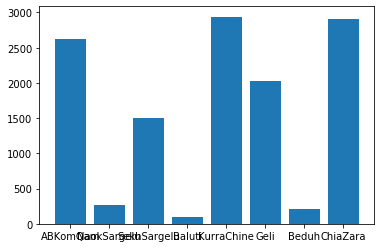

In [57]:
plt.bar(df_wave.index, df_wave['Wavelength'])

But now let's dress that plot up to make it more useful, first we'll set up a [`list`](https://docs.python.org/3.7/library/stdtypes.html?highlight=list#lists) to store [hex color codes](https://www.color-hex.com/), and then change the figure size, add a title, labels and a grid.

In [58]:
colors = ['#339966', # Cretaceous
          '#333399', # Jurassic
          '#333399', # Jurassic
          '#CC99FF', # Upper Triassic
          '#CC99FF', # Upper Triassic
          '#800080', # Middle Triassic
          '#800080', # Lower Triassic
          '#800080', # Lower Triassic
         ]

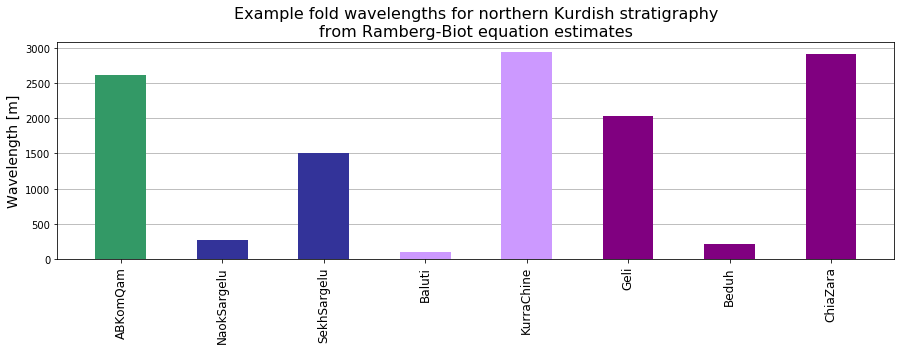

In [59]:
fig = plt.figure(figsize=(15,4))
plt.bar(df_wave.index,
        df_wave['Wavelength'],
        color=colors,
        zorder=2,
        width=0.5,
       )
plt.title('Example fold wavelengths for northern Kurdish stratigraphy\nfrom Ramberg-Biot equation estimates',
          fontsize=16
         )
plt.ylabel('Wavelength [m]', fontsize=14)
plt.xticks(range(8), (wavelengths.keys()), rotation=90, fontsize=12)
plt.grid(axis='y', zorder=1)
plt.show()

### Geophysical equations

If you're into geophysics, for many equations you won't even have to code them yourself as there is a ready-made repo called [bruges](https://github.com/agile-geoscience/bruges) which stands for:

<br>
<a href="https://agilescientific.com/bruges" target="_blank">
    <img src="http://ageobot.elasticbeanstalk.com/bruges.png" width=600 />
</a>

There are multiple modules inside Bruges:

In [60]:
import bruges

dir(bruges)

['BrugesError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'attribute',
 'bruges',
 'filters',
 'get_bruges',
 'noise',
 'petrophysics',
 'reflection',
 'rockphysics',
 'transform',
 'unit',
 'util']

For example if you want to make a ricker wavelet, bruges has you covered:

<div style="padding:0.5em 1em 1em; background-color:#eeffee; border-radius:5px; border:1px solid #77aa77;">

<h2>EXERCISE</h2>

<p><b>Use the bruges library to plot a ricker wavelet using matplotlib's `plt.plot()` function.</b></p>
</div>

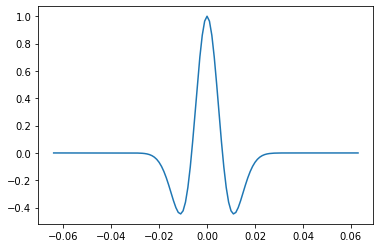

In [62]:
w, t = bruges.filters.ricker(duration=0.128, dt=0.001, f=35, return_t=True)
plt.plot(t, w)

In [63]:
import ipywidgets as widgets

@interact(duration=widgets.FloatSlider(value=0.256,min=0.04,max=0.512,step=0.004,
                                      description='duration',
                                      continuous_update=False,
                                      readout_format='.3f'),
          dt=widgets.FloatSlider(value=0.001,min=0.0001,max=0.008,step=0.0001,
                                      description='dt',
                                      continuous_update=False,
                                      readout_format='.4f'),
          frequency=widgets.IntSlider(value=25,min=1,max=75,step=1,
                                      description='frequency',
                                      continuous_update=False,
                                      readout_format='d'),       
          filled=widgets.Checkbox(value=True,description='fill wavelet',disabled=False)
         )

def plot_ricker(duration, dt, frequency, filled):
    """
    Plot a filter:
    Args:
        function (function): one of ['ricker', 'gabor', 'sinc', 'cosine']
        duration (float): The length in seconds of the wavelet.
        dt (float): The sample interval in seconds.
        frequency (ndarray): Dominant frequency of the wavelet in Hz.
        fill (boolean): whether the filter plot is filled between 0 and wavelet.
    Returns:
        ndarray. {function} wavelet with centre frequency 'frequency' sampled on t.
    """
    # call the wavelet function
    w, t = bruges.filters.ricker(duration, dt, f=frequency, return_t=True)

    # create the plot
    fig, ax = plt.subplots(figsize=(15, 6), ncols=1) 
    ax.plot(t, w, color='black')
    ax.grid()
    ax.set_title(f'Ricker, frequency={frequency}, duration={duration}, dt={dt}')    
    
    # define fill_between() parameters
    x_min = -duration / 2
    x_max = duration / 2
    x = np.arange(x_min, x_max, dt)
    
    # fill wavelet
    if filled:
        ax.fill_between(x, 0, w, where=w > 0, color='k')

    # show the plot
    plt.show()
    
    return


interactive(children=(FloatSlider(value=0.256, continuous_update=False, description='duration', max=0.512, min…

## Plotting a DEM and making cross sections
In this section, we'll make a digital elevation map of Mount St-Helens after the [1980 eruption](https://en.wikipedia.org/wiki/1980_eruption_of_Mount_St._Helens) to see the crater left by the eruption, and we'll also plot some cross-sections through the mountain comparing the topography pre- and post-eruption.

First we'll use [`numpy`](https://numpy.org/) to load some data we prepared earlier:

In [65]:
before = np.load('./data/st-helens_before.npy')
after = np.load('./data/st-helens_after.npy')

In [66]:
type(before)

numpy.ndarray

In [68]:
print(before.shape)
print(after.shape)

(448, 307)
(448, 307)


Then set up some variables:

In [69]:
difference = before - after
fontsize = 14
linewidth = 3
ew_section1 = 190
ns_section1 = 150

And finally make the [`figure` and `axes`](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html), first setting up the `figure` and then adding `axes` and specifying their positions to set up our plot just as we want it, we'll also add some `titles` and `labels`:

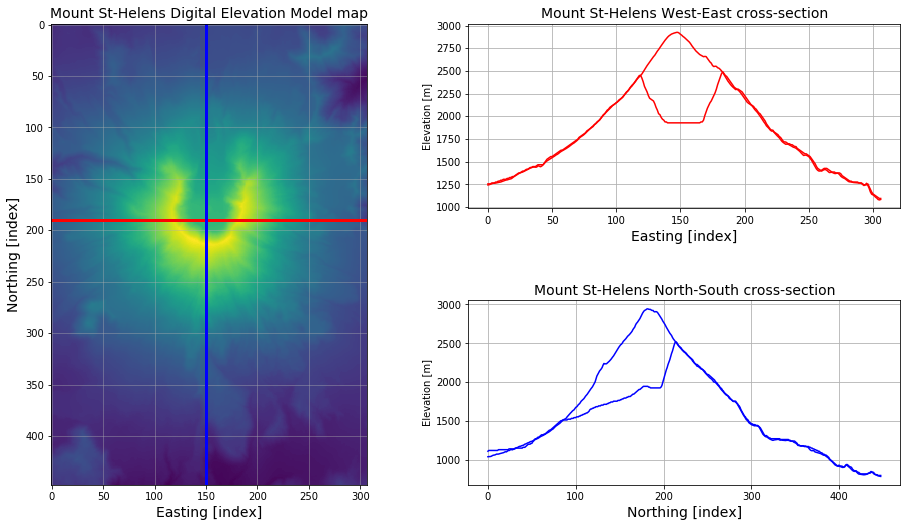

In [70]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_title('Mount St-Helens Digital Elevation Model map', fontsize=fontsize)
ax.imshow(after)
ax.axhline(ew_section1, color='red', lw=linewidth)
ax.axvline(ns_section1, color='blue', lw=linewidth)
ax.set_ylabel('Northing [index]', size=fontsize)
ax.set_xlabel('Easting [index]', size=fontsize)
ax.grid(alpha=0.5)

ax2 = fig.add_axes([0.8,0.58,0.5,0.32])
ax2.set_title('Mount St-Helens West-East cross-section', fontsize=fontsize)
ax2.plot(before[ew_section1], c='red')
ax2.plot(after[ew_section1], c='red')
ax2.set_xlabel('Easting [index]', size=fontsize)
ax2.set_ylabel('Elevation [m]')
ax2.grid()

ax3 = fig.add_axes([0.8,0.1,0.5,0.32])
ax3.set_title('Mount St-Helens North-South cross-section', fontsize=fontsize)
ax3.plot(before[:,ns_section1], c='blue')
ax3.plot(after[:,ns_section1], c='blue')
ax3.set_xlabel('Northing [index]', size=fontsize)
ax3.set_ylabel('Elevation [m]')
ax3.grid()

## Loading up well files and plotting curves

First let's see what files we have with the inbuilt [`glob`](https://docs.python.org/3.7/library/glob.html#module-glob) module:

In [73]:
import glob

wells = glob.glob('./data/*.[Ll][Aa][Ss]')
wells

['./data\\B-41.las',
 './data\\L-30.las',
 './data\\P-129_out.LAS',
 './data\\R-39.las',
 './data\\R-90.las',
 './data\\Well_A.las']

### Inspecting a single well

In [74]:
from welly import Well

well_R39 = Well.from_las('./data/R-39.las')
well_R39

C:\Users\LBHAWZ\AppData\Local\Continuum\anaconda3\envs\transform2020\lib\site-packages\welly\well.py:173: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


Well(uwi: '303N764340060300', 22 curves: ['BS', 'CALI', 'CHR1', 'CHR2', 'CHRP', 'CHRS', 'DRHO', 'DT1R', 'DT2', 'DT2R', 'DT4P', 'DT4S', 'GR', 'HD1', 'HD2', 'HD3', 'NPOR', 'PEF', 'RHOB', 'SPR1', 'TENS', 'VPVS'])

### Inspecting a single curve

In [76]:
well_R39.data['GR']

Curve([45.7427, 48.7082, 46.7065, ..., 32.0276, 32.0276, 32.0276])

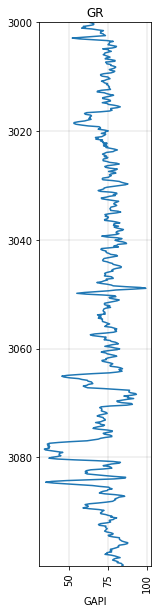

In [77]:
gr = well_R39.data['GR']
gr.to_basis(start=3000, stop=3100).plot()

### Smoothing a curve

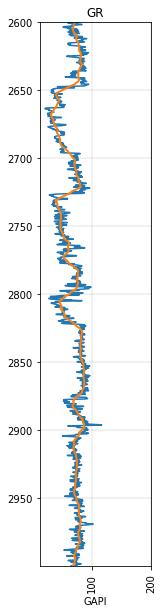

In [79]:
sm = gr.to_basis(start=2600, stop=3000).smooth(window_length=10, samples=False)

fig, ax = plt.subplots(figsize=(2, 10))
gr.plot(ax=ax)
sm.plot(ax=ax, lw=2)

### Plot all curves in one well

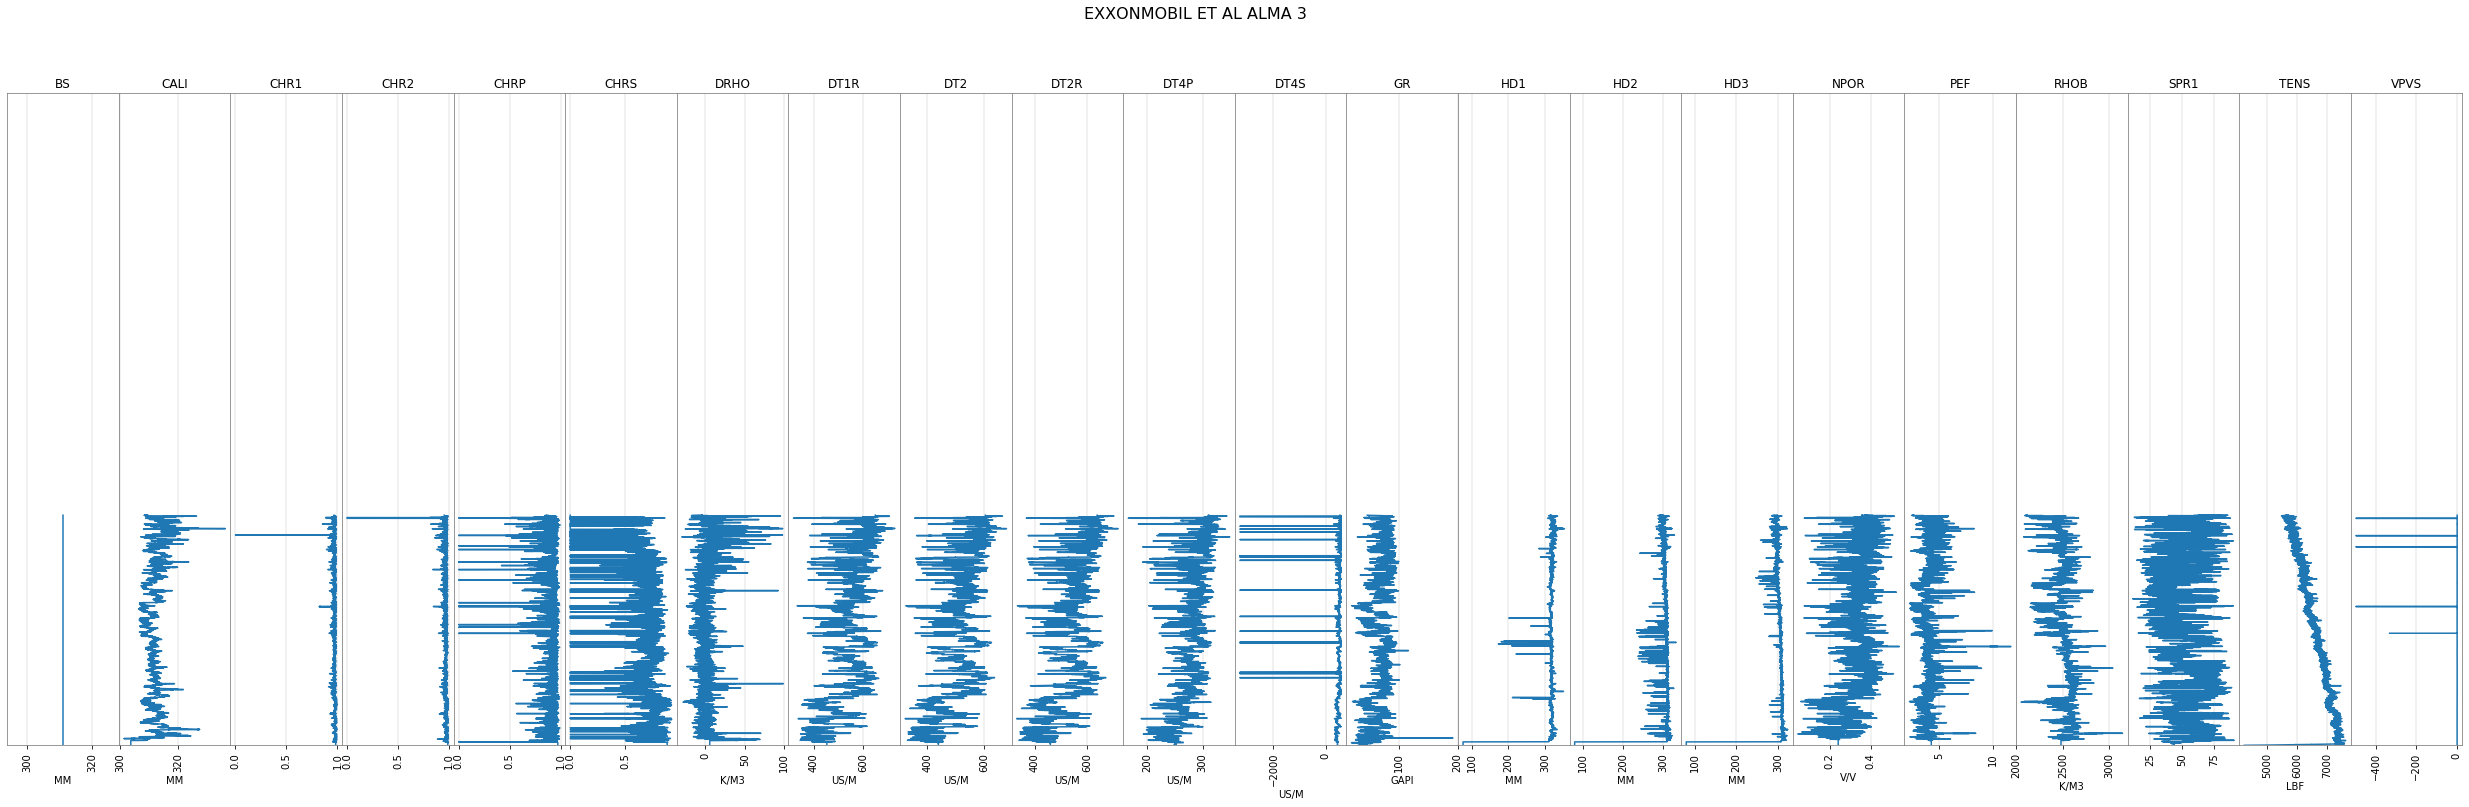

In [80]:
well_R39.plot()

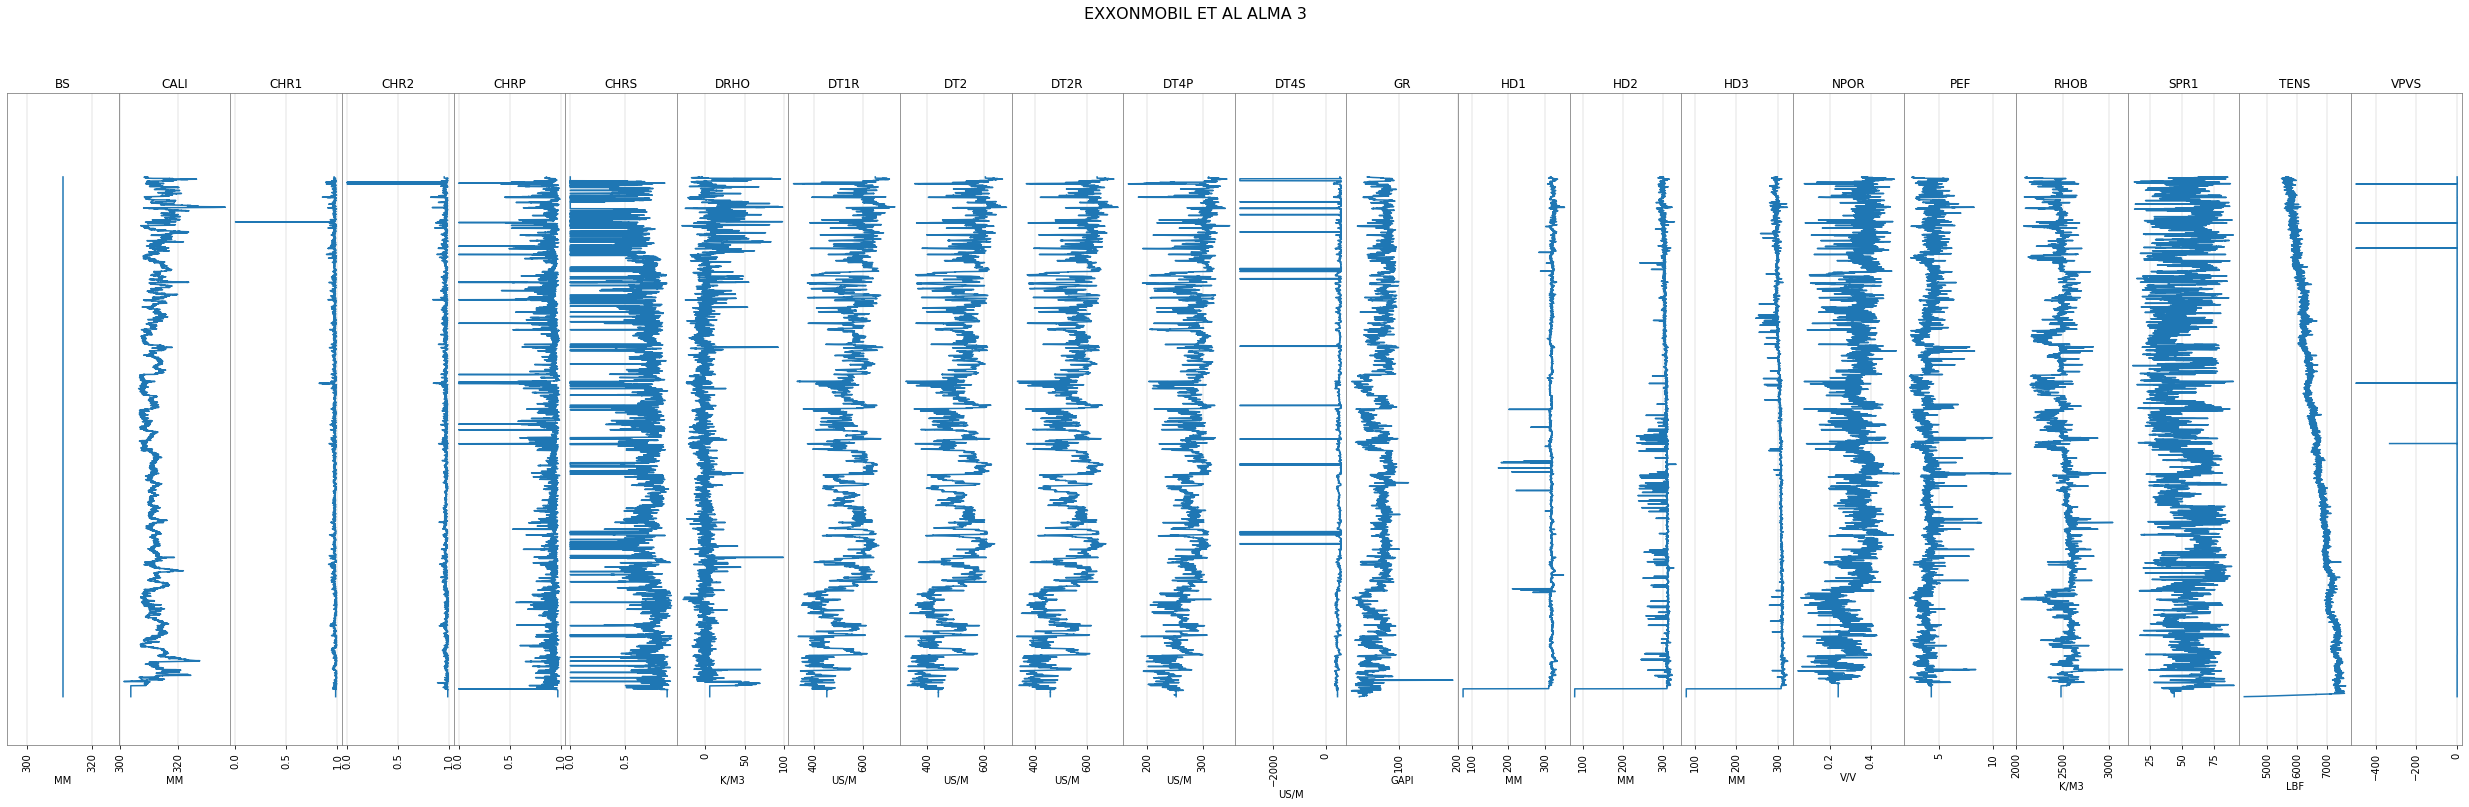

In [81]:
well_R39.plot(extents=(2000,3500))

### ...or in a group of wells

In [82]:
wells

['./data\\B-41.las',
 './data\\L-30.las',
 './data\\P-129_out.LAS',
 './data\\R-39.las',
 './data\\R-90.las',
 './data\\Well_A.las']

C:\Users\LBHAWZ\AppData\Local\Continuum\anaconda3\envs\transform2020\lib\site-packages\welly\well.py:173: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)
C:\Users\LBHAWZ\AppData\Local\Continuum\anaconda3\envs\transform2020\lib\site-packages\welly\well.py:173: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)
C:\Users\LBHAWZ\AppData\Local\Continuum\anaconda3\envs\transform2020\lib\site-packages\welly\well.py:173: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


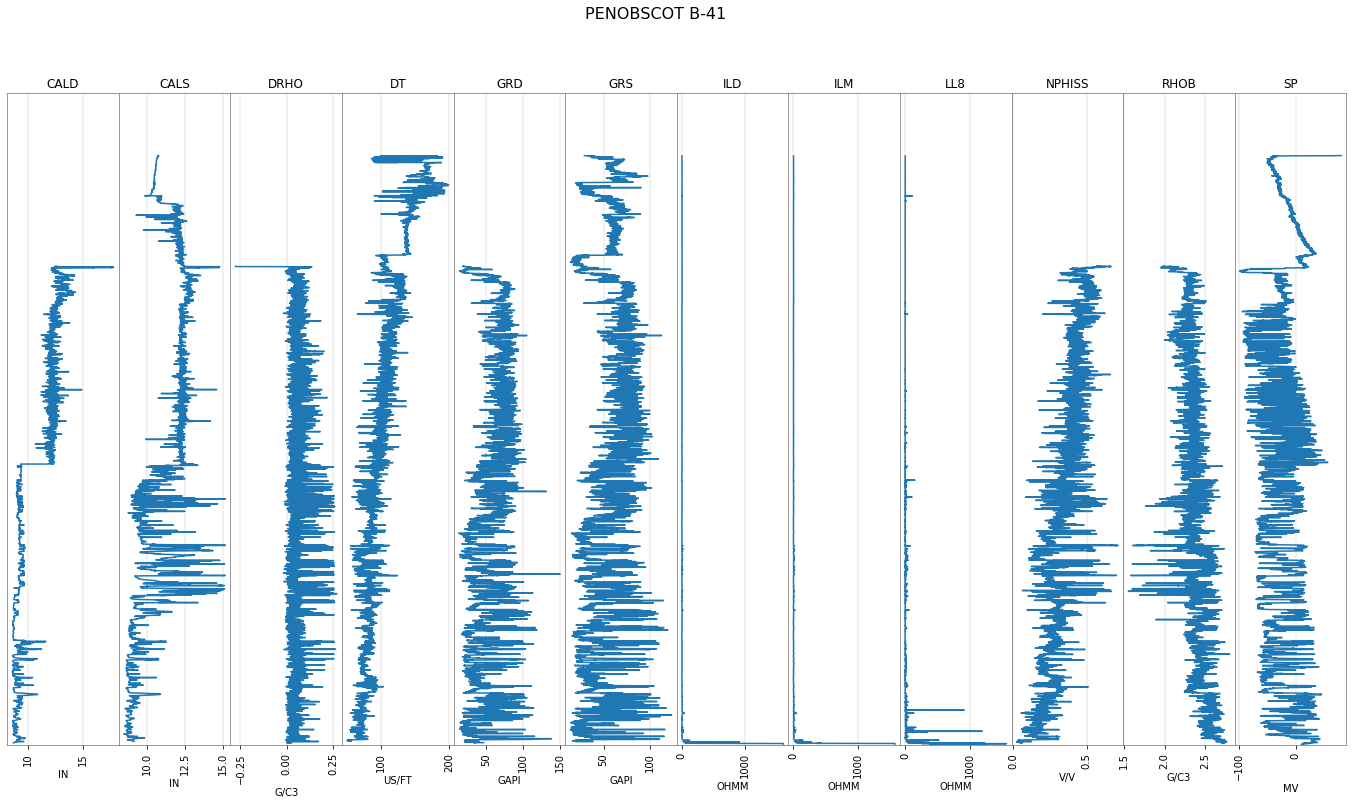

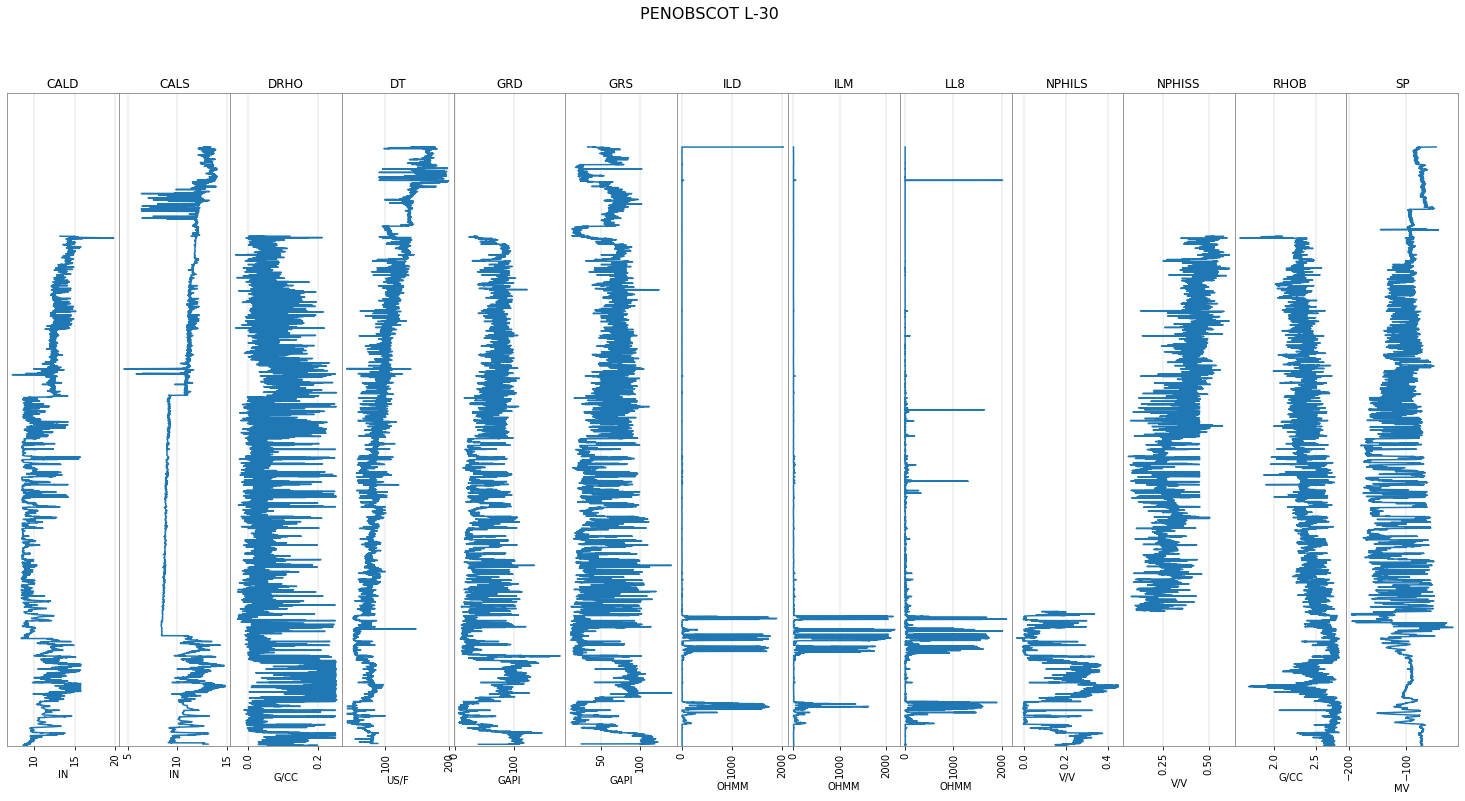

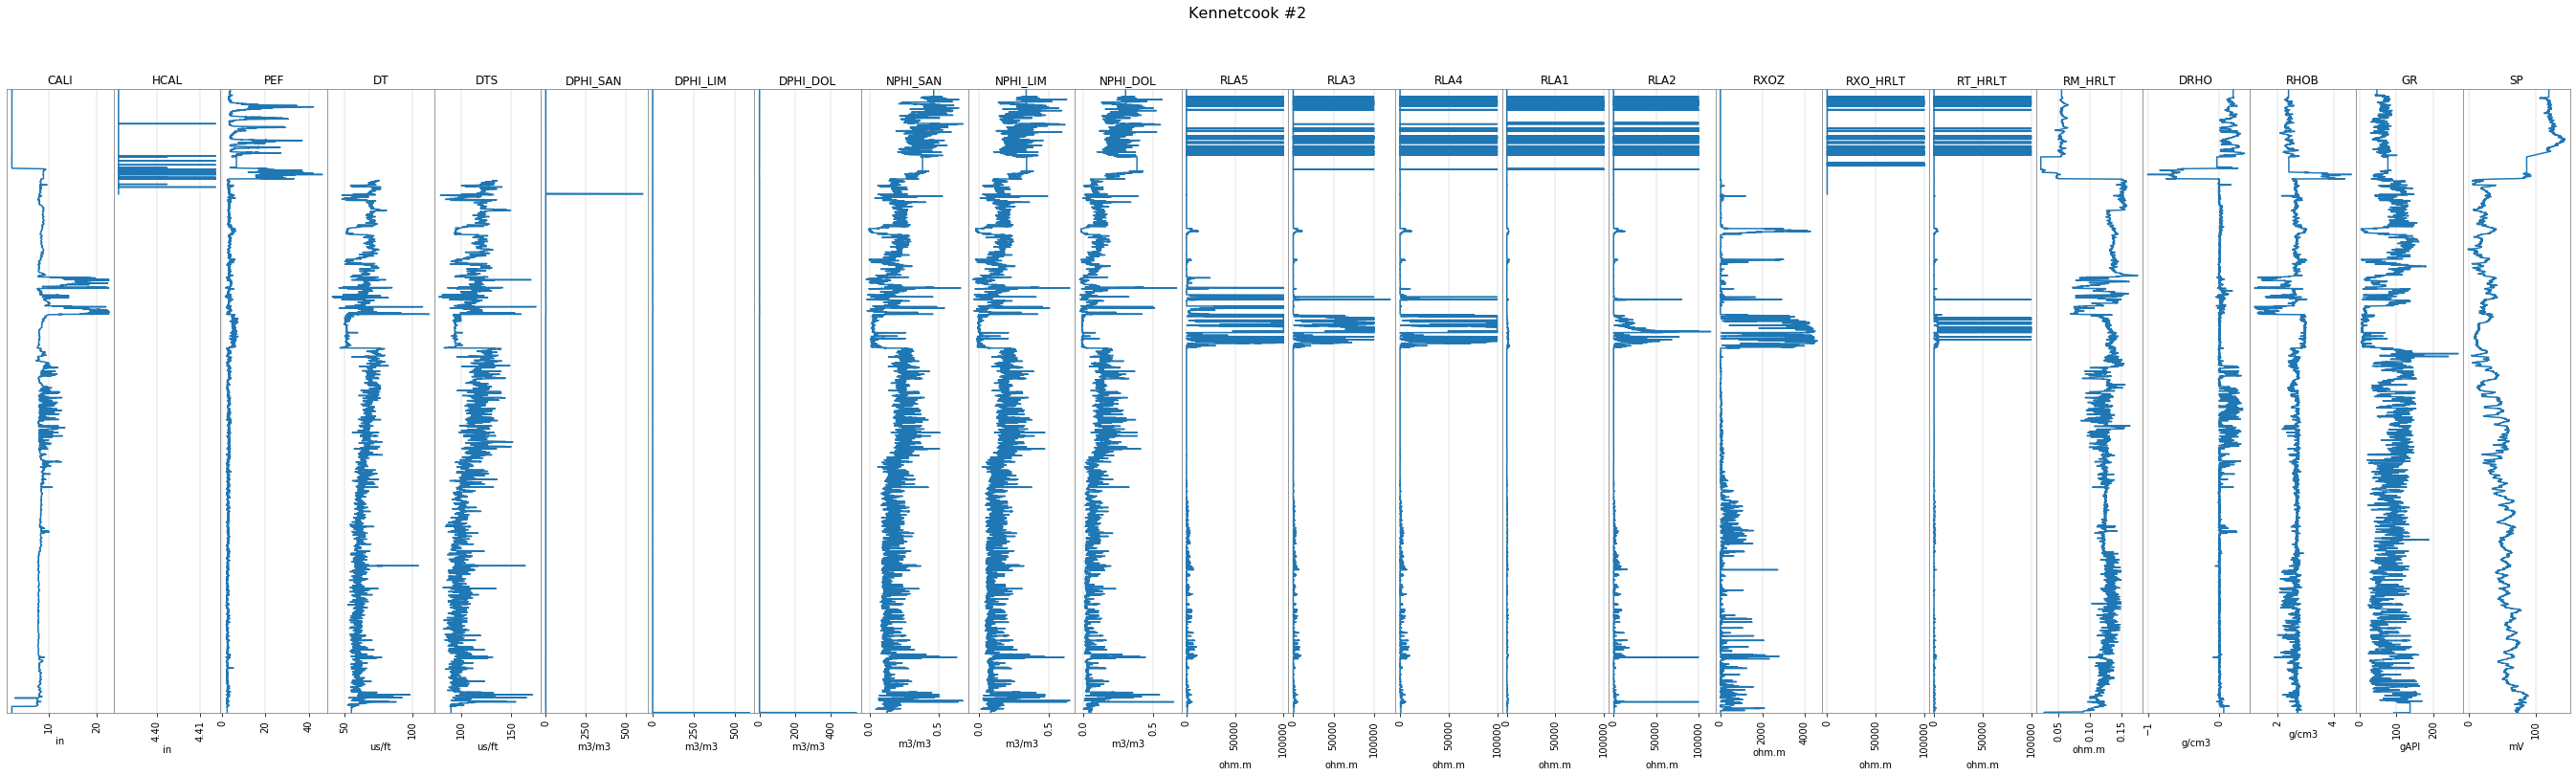

In [83]:
for well in wells[:3]:
    w = Well.from_las(well)
    w.plot()

### A Well has a `.df()` method that returns a pandas DataFrame

We'll use the `.colums` attribute on the `DataFrame` to choose the logs we want:

In [84]:
well_R39.df()

,BS,CALI,CHR1,CHR2,CHRP,CHRS,DRHO,DT1R,DT2,DT2R,...,GR,HD1,HD2,HD3,NPOR,PEF,RHOB,SPR1,TENS,VPVS
Depth,,,,,,,,,,,,,,,,,,,,,
2193.0360,311.1,308.6285,0.9672,0.9511,0.8591,0.000,-4.5836,648.5713,603.0959,637.4547,...,45.7427,316.1042,299.1055,297.0981,0.3596,2.6578,2107.9136,66.1551,5645.0,1.8726
2193.1884,311.1,308.9605,0.9672,0.9511,0.8591,0.000,-4.6862,648.5713,603.0959,637.4547,...,48.7082,315.8991,300.9124,297.9238,0.3567,2.6592,2111.6606,62.2926,5643.0,1.8726
2193.3408,311.1,308.7472,0.9672,0.9511,0.8591,0.000,-3.7228,648.5713,603.0959,637.4547,...,46.7065,316.7083,301.1115,297.1500,0.3557,2.6128,2113.4634,75.0683,5659.0,1.8726
2193.4932,311.1,309.0811,0.9672,0.9511,0.8591,0.000,-5.9603,648.5713,603.0959,637.4547,...,47.5368,317.2007,299.4096,295.5205,0.3710,2.5569,2117.1326,85.4504,5661.0,1.8726
2193.6456,311.1,309.6547,0.9672,0.9511,0.8591,0.000,-7.5235,648.5713,603.0959,637.4547,...,48.8417,315.5686,296.1537,292.6058,0.3582,2.5500,2112.7310,82.3022,5737.0,1.8726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387.5472,311.1,303.7090,0.9823,0.9856,0.9704,0.885,5.4429,452.3000,438.7053,459.9070,...,32.0276,75.6293,80.5653,80.2588,0.2414,4.2916,2480.8645,43.7397,4663.0,1.7375
3387.6996,311.1,303.7090,0.9823,0.9856,0.9704,0.885,5.4429,452.3000,438.7053,459.9070,...,32.0276,75.6293,80.5653,80.2588,0.2414,4.2916,2480.8645,43.7397,4625.0,1.7375
3387.8520,311.1,303.7090,0.9823,0.9856,0.9704,0.885,5.4429,452.3000,438.7053,459.9070,...,32.0276,75.6293,80.5653,80.2588,0.2414,4.2916,2480.8645,43.7397,4476.0,1.7375


In [85]:
well_R39.df().describe()

,BS,CALI,CHR1,CHR2,CHRP,CHRS,DRHO,DT1R,DT2,DT2R,...,GR,HD1,HD2,HD3,NPOR,PEF,RHOB,SPR1,TENS,VPVS
count,7.843000e+03,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,...,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7842.000000
mean,3.111000e+02,311.966093,0.971758,0.965176,0.897078,0.617899,2.388237,541.423721,510.784128,539.488015,...,67.490111,315.017160,303.315282,299.356292,0.328138,4.015724,2493.556531,52.477588,6598.434528,1.522826
std,4.604610e-11,3.404970,0.017258,0.028955,0.092619,0.251050,13.771860,76.129959,69.004831,74.866802,...,16.777510,30.388588,28.610288,28.081866,0.074445,0.788220,114.662210,16.016594,510.756339,11.916064
min,3.111000e+02,301.330600,0.000000,0.000000,0.000000,0.000000,-30.044900,317.169600,322.261200,332.091200,...,18.689300,75.629300,80.565300,80.258800,0.043400,2.273100,2050.229000,11.428000,4250.000000,-498.901700
25%,3.111000e+02,309.924300,0.966500,0.959200,0.882450,0.575050,-5.151100,485.613650,455.939900,481.163550,...,55.299400,316.285600,303.871150,297.636700,0.286850,3.600950,2450.387250,38.858150,6193.000000,1.721525
50%,3.111000e+02,311.673900,0.973600,0.968200,0.922800,0.699600,0.042800,557.447600,526.526400,557.913300,...,72.061800,318.658800,308.322600,304.349700,0.340400,3.971900,2505.075000,52.797700,6622.000000,1.851600
75%,3.111000e+02,313.675400,0.980600,0.975600,0.944500,0.780200,5.442900,603.188550,567.345900,600.568800,...,80.179850,320.699050,310.473200,307.616200,0.382500,4.334000,2569.123050,65.904350,7014.000000,1.912675
max,3.111000e+02,336.138400,0.994900,0.993300,0.993100,0.926800,99.214000,728.206400,677.245100,717.420700,...,191.928200,354.231000,332.283300,322.184300,0.541500,11.656500,3144.669700,90.308000,7623.000000,2.705800


In [86]:
well_R39.df().columns

Index(['BS', 'CALI', 'CHR1', 'CHR2', 'CHRP', 'CHRS', 'DRHO', 'DT1R', 'DT2',
       'DT2R', 'DT4P', 'DT4S', 'GR', 'HD1', 'HD2', 'HD3', 'NPOR', 'PEF',
       'RHOB', 'SPR1', 'TENS', 'VPVS'],
      dtype='object')

And then get some statistics for two curves using the [`.describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method on the DataFrame:

In [89]:
well_R39.df().loc[:, ['GR', 'RHOB']].describe(percentiles=[.1, .5, .9])

,GR,RHOB
count,7843.000000,7843.000000
mean,67.490111,2493.556531
std,16.777510,114.662210
min,18.689300,2050.229000
10%,41.872920,2331.781060
50%,72.061800,2505.075000
90%,85.759620,2611.874380
max,191.928200,3144.669700


### Log QC

The [`welly`](https://github.com/agile-geoscience/welly) library gives us access to some QC capabilities to rapidly inspect our logs - this might be particularly useful to prepare a Machine Learning task for example:

In [90]:
import welly.quality as qc
from IPython.display import HTML

tests = {
    'each': [qc.no_gaps, qc.no_monotonic],
    'GR': [qc.all_positive],
    'RHOB': [qc.all_positive],
}

results = well_R39.qc_table_html(tests=tests)

HTML(results)

Curve,Passed,Score,all_positive,no_monotonic,no_gaps
BS,1 / 2,0.500,,False,True
CALI,1 / 2,0.500,,False,True
CHR1,2 / 2,1.000,,True,True
CHR2,2 / 2,1.000,,True,True
CHRP,2 / 2,1.000,,True,True
CHRS,1 / 2,0.500,,False,True
DRHO,1 / 2,0.500,,False,True
DT1R,2 / 2,1.000,,True,True
DT2,2 / 2,1.000,,True,True
DT2R,2 / 2,1.000,,True,True


### Plot multiple logs of the same well

Now we'll set up a log panel by using [`striplog`'s](https://github.com/agile-geoscience/striplog) [`Legend` module](https://striplog.readthedocs.io/en/latest/api/striplog.legend.html#module-striplog.legend). 
We select some logs we want to plot in different tracks, then define a legend for the display of each curve:

In [91]:
from striplog import Legend

tracks = ['MD', 'CALI', 'GR', 'RHOB', 'NPOR', ['DT1R', 'DT2', 'DT2R']]

legend = Legend.builtin('NSDOE')

curve_legend_csv = """colour,lw,ls,xlim,xscale,curve mnemonic
black,0.5,-,,linear,CALI
green,1.0,-,"0,200",linear,GR
red,1.0,-,,linear,RHOB
blue,1.0,-,,linear,NPOR
red,0.4,-,,linear,DT1R
#e6153b,0.4,-,,linear,DT2
#c7324d,0.4,-,,linear,DT2R
"""

curve_legend = Legend.from_csv(text=curve_legend_csv)

complete_legend = legend + curve_legend

And once this set up is done, we can make a plot for any given well using the `.plot` method and passing the `tracks` and `legend` variables to it:

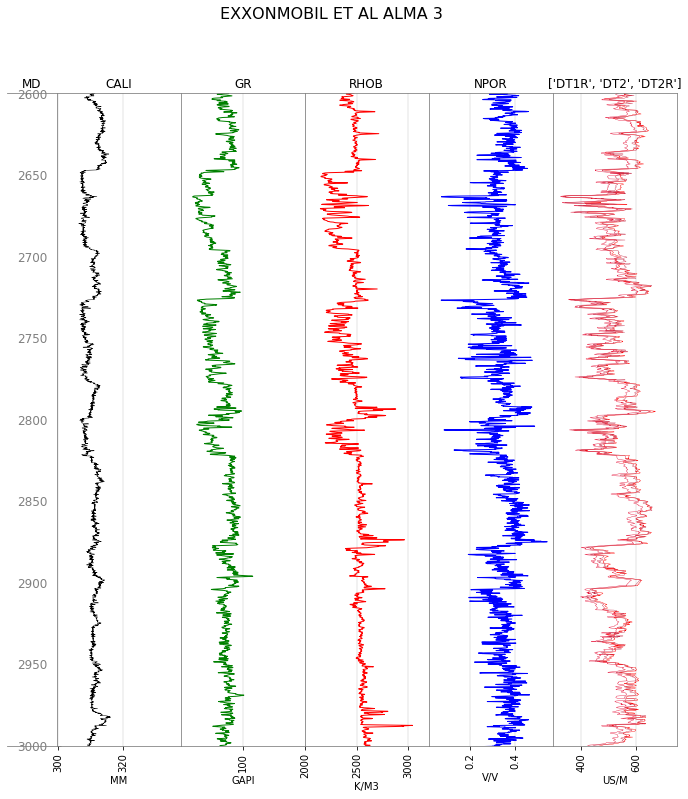

In [92]:
well_R39.plot(tracks=tracks, legend=complete_legend, extents=(2600, 3000))

## Loading a seismic volume and inspecting slices

For this task, we will use Equinor's [segyio](https://github.com/equinor/segyio) library which describes itself as follows:

> Segyio is a small LGPL licensed C library for easy interaction with SEG Y formatted seismic data, with language bindings for Python and Matlab. Segyio is an attempt to create an easy-to-use, embeddable, community-oriented library for seismic applications. Features are added as they are needed; suggestions and contributions of all kinds are very welcome.

It allows us to load 2D and 3D seismic, but of course with all the [usual caveats about the segy format](https://agilescientific.com/blog/2014/3/26/what-is-seg-y.html).

So let's first import and inspect a curated seismic cube:

If you don't have the file yet, **[get the large dataset from Agile's S3 bucket](https://s3.amazonaws.com/agilegeo/Penobscot_0-1000ms.sgy.zip)**. It's 140MB.

In [94]:
import segyio

with segyio.open('./data/Penobscot_0-1000ms.sgy') as s:
    c = segyio.cube(s)

In [95]:
type(c)

numpy.ndarray

In [96]:
c.shape

(601, 481, 251)

<div style="padding:0.5em 1em 1em; background-color:#eeffee; border-radius:5px; border:1px solid #77aa77;">

<h2>EXERCISE</h2>

<p><b>Plot a single section of the seismic, for example an inline section.</b></p>
    <p>You'll have to make sure inlines and crosslines are <a href="https://numpy.org/doc/stable/reference/generated/numpy.transpose.html">transposed</a> so that the seabed is horizontal.</p>
</div>

In [98]:
c[150, :, :].shape

(481, 251)

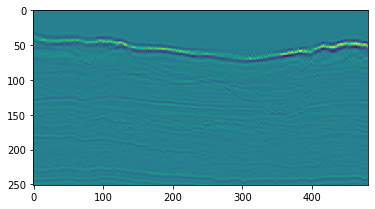

In [100]:
plt.imshow(c[150, :, :].T)

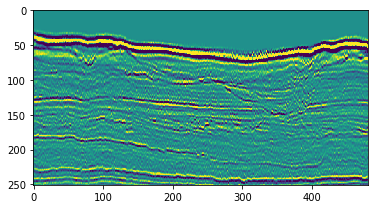

In [101]:
ma = np.percentile(c, 98)
plt.imshow(c[150, :, :].T, vmin=-ma, vmax=ma) #inline

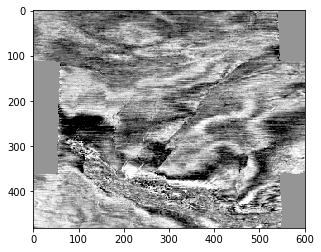

In [102]:
ma = np.percentile(c, 98)
plt.imshow(c[:, :, 140].T, vmin=-ma, vmax=ma, cmap='Greys') #timeslice

In [103]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

## Scanning through a seismic volume interactively

As we did before, we can use `interact` to explore this cube on the fly, as long as it fits in memory of course. We will define a `seismic loading` function, a `seismic plotting` function, and finally call this plotting function with `interact`:

In [106]:
def load_seismic(volume):
    """
    Load a seismic cube
    Args:
        volume path
    Return:
        numpy array
    """
    with segyio.open(volume) as s:
        vol = segyio.cube(s)
    return vol

In [107]:
def seismic_plotter(colormap, section, inline, xline, timeslice, volume):
    """Plot a given seismic ILine, XLine or Timeslice with a choice of colormaps"""
    # load a seismic volume
    vol = load_seismic(volume)
    
    # display options for different sections
    sections = {
        'inline': {'amp': vol[inline,:,:].T, 'line': inline, 'shrink_val': 0.6, 
                  'axhline_y': timeslice, 'axhline_c': 'b', 
                  'axvline_x': xline, 'axvline_c': 'g',
                  'axspine_c': 'r',
                  'aspect': 1
                  },
        'xline': {'amp': vol[:,xline,:].T, 'line': xline, 'shrink_val': 0.5, 
                  'axhline_y': timeslice, 'axhline_c': 'b', 
                  'axvline_x': inline, 'axvline_c': 'r',
                  'axspine_c': 'g',
                  'aspect': 1
                 },
        'timeslice': {'amp': vol[:,:,timeslice], 'line': timeslice, 'shrink_val': 0.95, 
                  'axhline_y': xline, 'axhline_c': 'g', 
                  'axvline_x': inline, 'axvline_c': 'r',
                  'axspine_c': 'b',
                  'aspect': 0.5
                 },
    }

    # scale amplitudes
    ma = np.percentile(vol, 98)
    
    # plot figure
    fig, ax = plt.subplots(figsize=(18, 6), ncols=1)

    # apply options
    sec = sections[section]    
    im = ax.imshow(sec['amp'], aspect=sec['aspect'], vmin=-ma, vmax=ma, cmap=colormap)
    ax.set_title(f'Penobscot_0-1000ms {section} {sec["line"]}', fontsize=18)
    plt.colorbar(im, ax=ax, shrink=sec['shrink_val']).set_label('Amplitudes')
     
    # add projected lines
    ax.axhline(y=sec['axhline_y'], linewidth=1.5, color=sec['axhline_c'])
    ax.axvline(x=sec['axvline_x'], linewidth=1.5, color=sec['axvline_c'])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)     
        ax.spines[axis].set_color(sec['axspine_c'])
    
    return    

In [108]:
_ = interact(seismic_plotter,
             colormap=['Greys', 'Greys_r', 'seismic', 'seismic_r', 'viridis', 'plasma', 'inferno', 'magma'],
             section=widgets.RadioButtons(options=['inline', 'xline', 'timeslice'],
                                          value='inline',description='slicer',disabled=False),
             inline=widgets.IntSlider(value=300,min=0,max=600,step=1,continuous_update=False,
                                      description='<font color="red">inline</>'),
             xline=widgets.IntSlider(value=240,min=0,max=480,step=1,continuous_update=False,
                                     description='<font color="green">xline</>'),
             timeslice=widgets.IntSlider(value=125,min=0,max=250,step=1,continuous_update=False,
                                         description='<font color="blue">timeslice</>'),
             volume='./data/Penobscot_0-1000ms.sgy',
            )

interactive(children=(Dropdown(description='colormap', options=('Greys', 'Greys_r', 'seismic', 'seismic_r', 'v…

<hr />
<img src="https://avatars1.githubusercontent.com/u/1692321?v=3&s=200" style="float:center" width="40px" />
<p><center>© 2020 <a href="http://www.agilegeoscience.com/">Agile Geoscience</a> — <a href="https://creativecommons.org/licenses/by/4.0/">CC-BY</a></center></p>